In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
import shap

In [5]:
data = pd.read_csv("test.csv")
data.shape

(1000, 21)

In [6]:
X = data.iloc[:,0:20]  #independent variable columns
X.shape

(1000, 20)

In [7]:
y = data.iloc[:,-1]    #target variable column 
y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    1
997    0
998    0
999    1
Name: wifi, Length: 1000, dtype: int64

In [10]:
#extracting top 10 best features by applying SelectKBest class
features = SelectKBest(score_func=chi2, k=10)
fit = features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfscores

,0
0,223.566155
1,0.025709
2,0.316392
3,1.052762
4,0.480637
5,15.793117
6,0.652040
7,1.372252
8,0.240068
9,42.328627


In [11]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns

,0
0,id
1,battery_power
2,blue
3,clock_speed
4,dual_sim
5,fc
6,four_g
7,int_memory
8,m_dep
9,mobile_wt


In [8]:
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #printing 10 best features

          Specs       Score
13     px_width  852.914979
14          ram  562.837207
0            id  223.566155
12    px_height   46.347162
9     mobile_wt   42.328627
5            fc   15.793117
11           pc   11.148155
7    int_memory    1.372252
3   clock_speed    1.052762
16         sc_w    0.809077


In [14]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

[0.05862389 0.05608554 0.0318484  0.05855341 0.02932899 0.05578766
 0.02534517 0.05348353 0.0568528  0.060524   0.05218956 0.05818582
 0.05729881 0.05996674 0.05945914 0.05697488 0.05666387 0.05843458
 0.02195961 0.0324336 ]


In [20]:
f = SelectFromModel(model, prefit=True)
X_new = f.transform(X)
X_new.shape

(1000, 15)

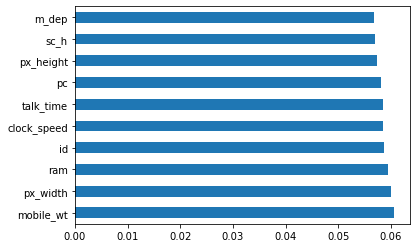

In [23]:
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

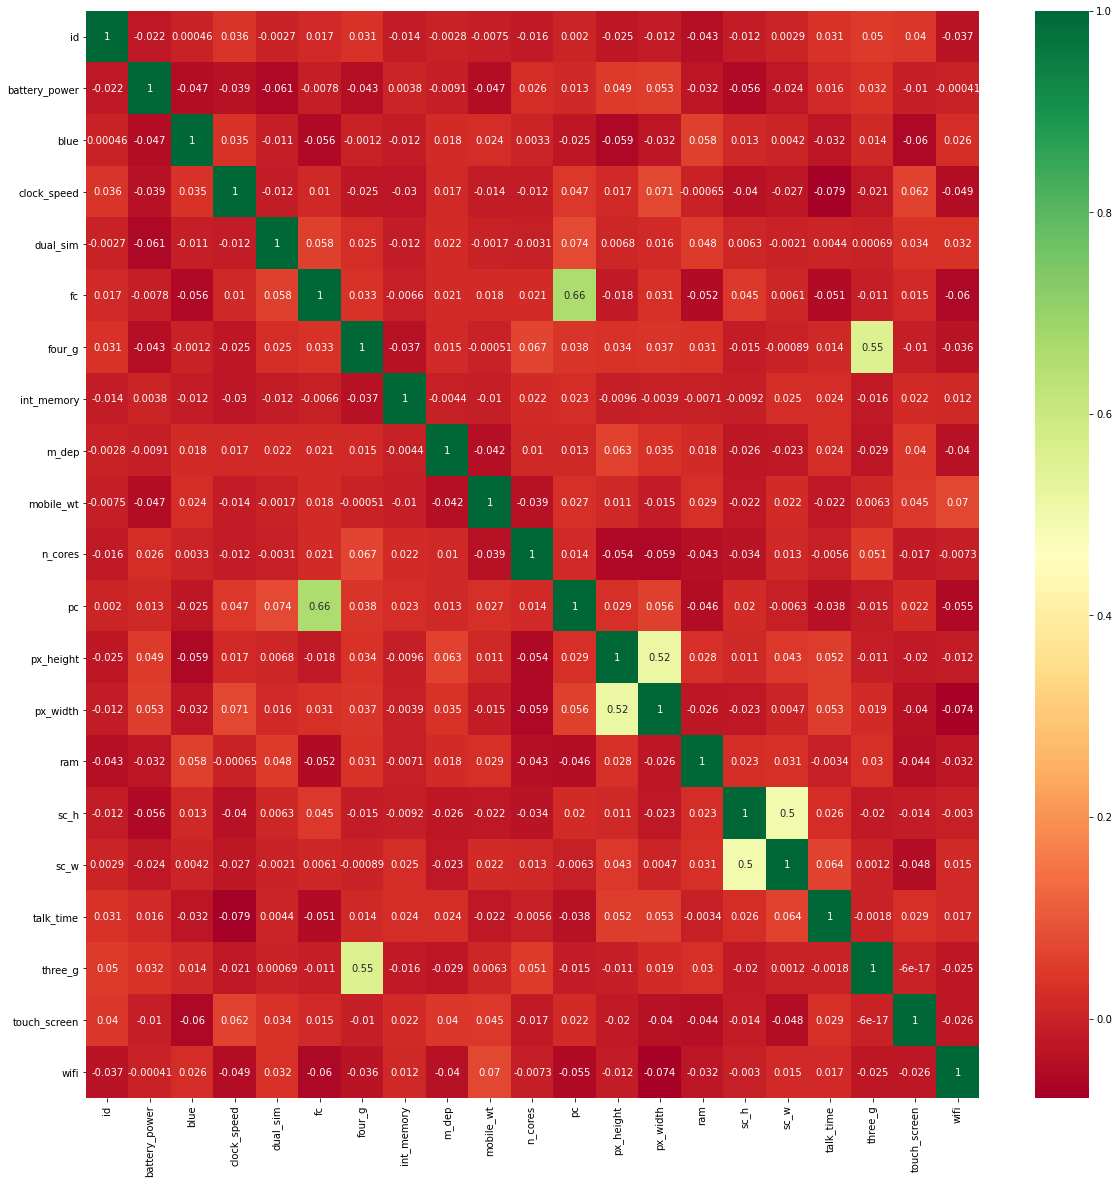

In [25]:
#obtain the correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
X.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen'],
      dtype='object')

In [33]:
# Standardizing the features
x = StandardScaler().fit_transform(X)
x

array([[-1.73031962, -0.47545131,  0.968496  , ..., -1.65335542,
        -1.76021608,  1.        ],
       [-1.72685552, -0.94278218,  0.968496  , ..., -0.74341848,
         0.56811207, -1.        ],
       [-1.72339142,  1.29207729,  0.968496  , ..., -0.19745632,
        -1.76021608,  1.        ],
       ...,
       [ 1.72339142, -0.1469316 , -1.03252879, ...,  0.53049324,
         0.56811207, -1.        ],
       [ 1.72685552,  0.65817305,  0.968496  , ..., -0.92540587,
        -1.76021608,  1.        ],
       [ 1.73031962,  0.04971753,  0.968496  , ..., -1.47136804,
         0.56811207, -1.        ]])

In [34]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(x)

In [38]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12'])
principalDf


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12
0,1.541986,2.658608,-0.276979,0.078725,2.678167,1.103947,-0.242123,-1.610334,-0.161079,-1.528494,-0.508190,0.458298
1,-0.122602,-0.907394,-1.512592,-0.598196,1.602464,1.864555,-2.943366,-0.229723,1.653513,0.415759,-0.036283,0.362827
2,-0.975769,1.089991,2.870311,-0.180698,1.068162,0.101083,0.775290,0.182998,1.543416,-0.909461,-2.691369,0.103913
3,3.247699,-0.409652,-1.686110,-0.644533,-0.733579,1.467927,-1.933710,0.624846,-0.214920,-1.968907,-0.255674,-0.491189
4,1.770166,-0.009859,-0.663824,1.214510,-1.532517,1.876613,0.192436,0.282679,0.907877,-1.008471,-0.114357,-0.607050
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.079183,-0.784237,-0.693061,1.052092,-0.808132,-1.070660,0.961973,0.005704,1.575065,1.541209,-0.774438,-0.016785
996,-1.069361,0.291316,1.608985,-2.217671,1.060661,-2.995230,-0.867332,0.075833,-1.071478,0.358690,-0.039501,1.854695
997,-0.619050,-1.119106,-1.501992,-1.285278,-0.863417,-0.545449,1.059529,0.051771,-2.765520,0.942897,0.276420,-0.957778
998,-1.133639,2.381695,-0.006521,1.325406,0.423877,-1.002430,-0.384578,-0.908392,0.034133,0.923129,0.100775,-0.765182


In [39]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,wifi
0,1.541986,2.658608,-0.276979,0.078725,2.678167,1.103947,-0.242123,-1.610334,-0.161079,-1.528494,-0.508190,0.458298,0
1,-0.122602,-0.907394,-1.512592,-0.598196,1.602464,1.864555,-2.943366,-0.229723,1.653513,0.415759,-0.036283,0.362827,0
2,-0.975769,1.089991,2.870311,-0.180698,1.068162,0.101083,0.775290,0.182998,1.543416,-0.909461,-2.691369,0.103913,1
3,3.247699,-0.409652,-1.686110,-0.644533,-0.733579,1.467927,-1.933710,0.624846,-0.214920,-1.968907,-0.255674,-0.491189,0
4,1.770166,-0.009859,-0.663824,1.214510,-1.532517,1.876613,0.192436,0.282679,0.907877,-1.008471,-0.114357,-0.607050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.079183,-0.784237,-0.693061,1.052092,-0.808132,-1.070660,0.961973,0.005704,1.575065,1.541209,-0.774438,-0.016785,0
996,-1.069361,0.291316,1.608985,-2.217671,1.060661,-2.995230,-0.867332,0.075833,-1.071478,0.358690,-0.039501,1.854695,1
997,-0.619050,-1.119106,-1.501992,-1.285278,-0.863417,-0.545449,1.059529,0.051771,-2.765520,0.942897,0.276420,-0.957778,0
998,-1.133639,2.381695,-0.006521,1.325406,0.423877,-1.002430,-0.384578,-0.908392,0.034133,0.923129,0.100775,-0.765182,0


In [47]:
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)
sfs = sfs.fit(X, y)

In [49]:
feat_names = data.columns 
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

Features sorted by their score:
[(0.0953, 'px_width'), (0.0937, 'id'), (0.0873, 'mobile_wt'), (0.0835, 'ram'), (0.0835, 'px_height'), (0.0801, 'battery_power'), (0.0672, 'int_memory'), (0.0552, 'clock_speed'), (0.055, 'talk_time'), (0.0494, 'sc_w'), (0.0494, 'sc_h'), (0.0493, 'pc'), (0.0422, 'fc'), (0.0395, 'm_dep'), (0.0332, 'n_cores'), (0.0079, 'touch_screen'), (0.0077, 'blue'), (0.0074, 'dual_sim'), (0.0072, 'three_g'), (0.0061, 'four_g')]


In [3]:
# load JS visualization code to notebook
shap.initjs()

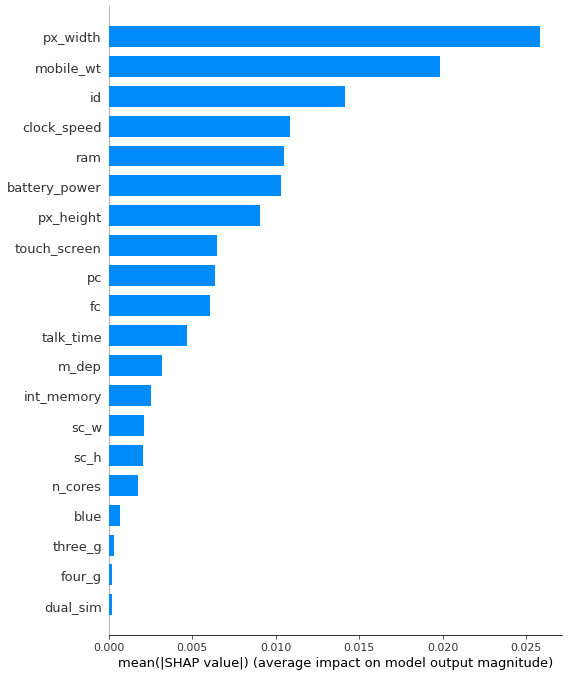

In [8]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, Y_train)

In [14]:
Y_pred=DT_reg.predict(X_test)
Y_pred

array([0.51489362, 0.51489362, 0.58666667, 0.6056338 , 0.58666667,
       0.22222222, 1.        , 0.51489362, 0.51489362, 0.61764706,
       0.28571429, 0.51489362, 0.93333333, 0.4       , 1.        ,
       0.51489362, 1.        , 0.51489362, 0.86956522, 0.51489362,
       1.        , 0.51489362, 0.51489362, 0.58666667, 0.17741935,
       0.58666667, 0.34782609, 0.        , 0.51489362, 0.86956522,
       0.34782609, 0.51489362, 0.        , 0.51489362, 0.51489362,
       0.86956522, 0.        , 0.4       , 0.        , 0.58666667,
       0.34782609, 0.6056338 , 0.22222222, 0.58666667, 1.        ,
       0.6056338 , 1.        , 0.6056338 , 0.51489362, 1.        ,
       0.61764706, 0.51489362, 0.58666667, 0.14285714, 0.17741935,
       0.6056338 , 0.51489362, 0.51489362, 0.51489362, 0.51489362,
       0.58666667, 0.17741935, 0.6056338 , 0.86956522, 0.17741935,
       0.        , 0.17741935, 0.17741935, 0.51489362, 0.58666667,
       0.28571429, 0.17741935, 0.51489362, 0.58666667, 0.86956

In [15]:
from sklearn.tree import plot_tree
import sklearn
print(sklearn.__version__)

1.2.0


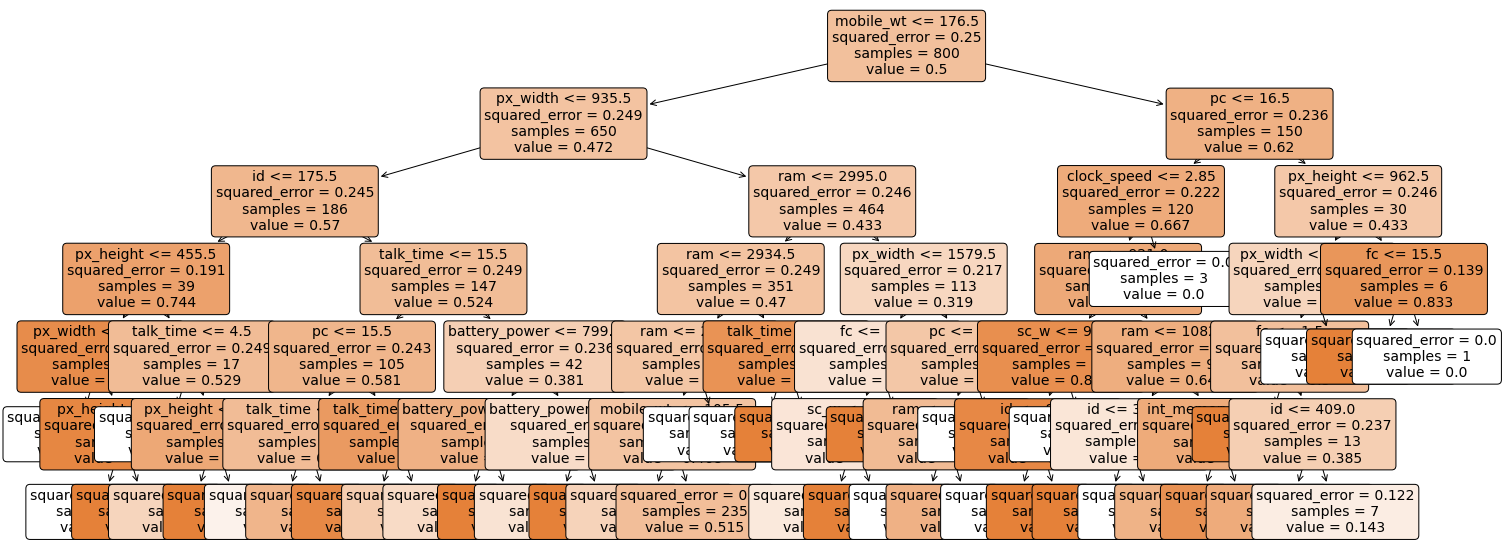

In [17]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)